In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 70)

In [3]:
# Importing entire dataset
data = pd.read_csv('../Finance/final_data.csv')

In [4]:
print(data.shape)
data.head()

(33354, 53)


,AGREEMENTID,FORECLOSURE,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,11220001,1.0,12001000.0,1.171011e+07,1.171011e+07,2010-08-30,13.421934,10.612692,45.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,8.614898e+06,8.439420e+06,175477.782641,2.135869e+05,2.135869e+05,0.0,175477.782641,1.164472e+05,1.159366e+07,2.725723e+06,8.693575e+06,2014-05-05,1000000.0,40.06,45,0.0,0.0,0.60,HL,10901100.0,NaN,NaN,45,1.0,5.0,NaN,33.0,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
1,11220002,1.0,12001001.0,1.929025e+07,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,180,1,2010-09-15,MUMBAI,100504.575864,100504.575864,0.0,1.061903e+07,1.033958e+07,279448.084560,0.000000e+00,0.000000e+00,0.0,279448.084560,1.234760e+07,6.942656e+06,4.945154e+06,1.713861e+07,2013-11-01,126530.0,84.31,38,99.0,0.0,0.60,HL,10901100.0,NaN,NaN,38,1.0,5.0,NaN,44.0,M,M,POSTGRAD,0.0,NaN,NaN,242703.982915,10.0,242703.982915,400070.0
2,11220006,1.0,12001005.0,3.933395e+06,3.933395e+06,2010-11-01,15.606900,11.549106,312.0,180,5,2010-11-02,MUMBAI,5947.630536,5947.630536,0.0,4.670211e+06,4.670211e+06,0.000000,1.179716e+06,1.179716e+06,0.0,0.000000,2.994184e+06,9.392115e+05,2.990124e+06,3.744831e+06,2017-08-05,22878.0,50.89,81,231.0,0.0,0.72,HL,10901101.0,NaN,NaN,81,3.0,4.0,NaN,43.0,M,M,GRAD,0.0,NaN,NaN,53536.208228,NaN,53536.208228,400070.0
3,11220008,1.0,12001007.0,1.002259e+07,1.002259e+07,2010-10-06,11.236968,10.612692,91.0,180,1,2010-10-06,THANE,60322.180776,60322.180776,0.0,1.313098e+07,1.306732e+07,63659.280762,6.770848e+06,6.770848e+06,0.0,63659.280762,4.295120e+04,9.979637e+06,4.648994e+06,5.747875e+06,2018-05-02,65741.0,84.63,91,0.0,0.0,0.60,HL,10901100.0,0,0,91,1.0,5.0,NaN,33.0,M,M,POSTGRAD,0.0,NaN,AVP,123370.483661,7.0,123370.483661,400070.0
4,11220010,1.0,12001009.0,7.755937e+06,7.755937e+06,2010-10-26,14.982624,10.924830,304.0,180,5,2010-10-26,MUMBAI,27732.787464,27732.787464,0.0,1.048923e+07,1.048923e+07,0.000000,1.202181e+05,1.202181e+05,0.0,0.000000,7.200653e+06,5.552847e+05,6.593778e+06,7.200653e+06,2018-04-05,54433.0,30.94,89,215.0,0.0,0.83,HL,10901101.0,0,0,90,3.0,4.0,NaN,37.0,M,M,UG,0.0,NaN,NaN,93803.844072,NaN,93803.839568,400070.0


In [5]:
# Checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33354 entries, 0 to 33353
Data columns (total 53 columns):
AGREEMENTID              33354 non-null int64
FORECLOSURE              20012 non-null float64
CUSTOMERID               32895 non-null float64
LOAN_AMT                 33354 non-null float64
NET_DISBURSED_AMT        33354 non-null float64
INTEREST_START_DATE      33354 non-null object
CURRENT_ROI              33354 non-null float64
ORIGNAL_ROI              33354 non-null float64
CURRENT_TENOR            33354 non-null float64
ORIGNAL_TENOR            33354 non-null int64
DUEDAY                   33354 non-null int64
AUTHORIZATIONDATE        33354 non-null object
CITY                     33354 non-null object
PRE_EMI_DUEAMT           33354 non-null float64
PRE_EMI_RECEIVED_AMT     33354 non-null float64
PRE_EMI_OS_AMOUNT        33354 non-null float64
EMI_DUEAMT               33354 non-null float64
EMI_RECEIVED_AMT         33354 non-null float64
EMI_OS_AMOUNT            33354 non-n

In [6]:
data_info = pd.DataFrame({
    'Unique_Values' : data.nunique(),
    'data_type' : data.dtypes,
    'Null_values' : data.isnull().sum()
}, index = data.nunique().index)

data_info

,Unique_Values,data_type,Null_values
AGREEMENTID,33354,int64,0
FORECLOSURE,2,float64,13342
CUSTOMERID,32895,float64,459
LOAN_AMT,13534,float64,0
NET_DISBURSED_AMT,14032,float64,0
INTEREST_START_DATE,1847,object,0
CURRENT_ROI,242,float64,0
ORIGNAL_ROI,238,float64,0
CURRENT_TENOR,429,float64,0
ORIGNAL_TENOR,93,int64,0


## Creating new features

In [7]:
# 1. Creating%_OF_LOAN_ PAID as (PAID_PRINCIPAL / LOAN_AMT) * 100 
data['%_OF_LOAN_PAID'] = (data['PAID_PRINCIPAL'] / data['NET_DISBURSED_AMT']) * 100

In [8]:
# 2. Creating %_CHANGE_IN_ROI as (CURRENT_ROI - ORIGINAL_ROI) / CURRENT_ROI * 100
data['%_CHANGE_IN_ROI'] = (data['CURRENT_ROI'] - data['ORIGNAL_ROI']) / data['ORIGNAL_ROI'] * 100

In [9]:
# 3. Creating %_OF_TENURE_COMPLETED
data['%_OF_TENURE_COMPLETED'] = data['COMPLETED_TENURE'] / data['CURRENT_TENOR'] * 100 

In [10]:
# 4. Creating %_OF_PRE_EMI_PAID as per the below function

# def percent_of_pre_emi_paid(x):
#     due, received, os = x[0], x[1], x[2]
#     if (os != 0):
#         return received/(os + due) * 100
#     else:
#         if(received != 0):
#             return due/received * 100
#         else:
#             return 0

def percent_of_pre_emi_paid(x):
    due, received, os = x[0], x[1], x[2]
    if (os == 0 and received == 0 and due == 0):
        return 0
    else:
        return received/(due + received + os) * 100

data['%_OF_PRE_EMI_PAID'] = data[['PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT']].\
apply(percent_of_pre_emi_paid, axis = 1)

In [11]:
# 5. Creating %_OF_EMI_PAID
def percent_of_emi_paid(x):
    due, received, os = x[0], x[1], x[2]
    if (os == 0 and received == 0 and due == 0):
        return 0
    else:
        return received/(due + received + os) * 100
    
data['%_OF_EMI_PAID'] = data[['EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT']].\
apply(percent_of_pre_emi_paid, axis = 1)

In [12]:
# 6. Creating %_OF_EXCESS_ADJUSTED
def percent_of_excess_adjusted(x):
    excess, adjusted = x[0], x[1]
    if (excess == 0):
        return 0
    else:
        return adjusted/excess * 100
    
data['%_OF_EXCESS_ADJUSTED'] = data[['EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT']].apply(percent_of_excess_adjusted, axis=1)

In [13]:
# Converting dates to datetime datatype
data['LAST_RECEIPT_DATE'] = pd.to_datetime(data['LAST_RECEIPT_DATE'])
data['INTEREST_START_DATE'] = pd.to_datetime(data['INTEREST_START_DATE'])
data['AUTHORIZATIONDATE'] = pd.to_datetime(data['AUTHORIZATIONDATE'])

In [14]:
# Filling null values in LAST_RECEIPT_DATE with the lastest last receipt date in the column
data['LAST_RECEIPT_DATE'] = data['LAST_RECEIPT_DATE'].fillna(data['LAST_RECEIPT_DATE'].max())

In [15]:
# 7. Creating new column as no of days passed from authorization date to last receipt date
data['DAYS_TILL_LAST_RECEIPT'] = data[['LAST_RECEIPT_DATE', 'AUTHORIZATIONDATE']].apply(lambda x : int(str(x[0] - x[1]).strip().split()[0]), axis = 1)

In [16]:
# Describing Newly extracted features
summary = data[data.columns[-1:-8:-1]].describe().T
summary['Skewness'] = data[data.columns[-1:-8:-1]].skew()
summary['Kurtosis'] = data[data.columns[-1:-8:-1]].kurtosis()
summary

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
DAYS_TILL_LAST_RECEIPT,33354.0,570.674402,701.661045,-14604.000000,197.000000,385.000000,791.000000,16376.000000,10.491546,229.464167
%_OF_EXCESS_ADJUSTED,33354.0,34.439066,46.818753,0.000000,0.000000,0.000000,100.000000,100.000000,0.653558,-1.550468
%_OF_EMI_PAID,33354.0,40.179926,19.524623,0.000000,50.000000,50.000000,50.000000,50.000000,-1.549205,0.432344
%_OF_PRE_EMI_PAID,33354.0,42.036007,18.280682,0.000000,50.000000,50.000000,50.000000,50.000000,-1.862776,1.472616
%_OF_TENURE_COMPLETED,33354.0,10.236489,14.168363,0.000000,1.500000,5.263158,13.551402,100.000000,2.925394,11.543677
%_CHANGE_IN_ROI,33354.0,2.340835,5.958046,-43.478004,0.000000,0.000000,4.683917,60.000000,0.498123,3.558665
%_OF_LOAN_PAID,33354.0,7.618043,18.941005,0.000000,0.515519,2.212324,6.928401,1998.771499,37.740355,3697.121638


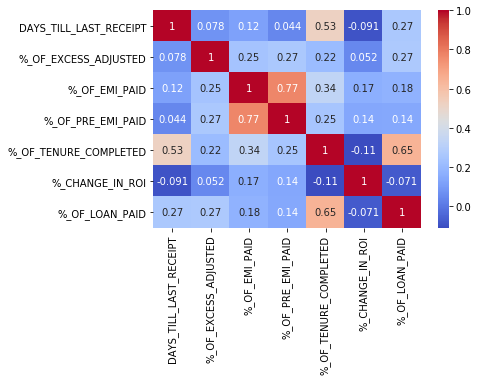

In [17]:
sns.heatmap(data[data.columns[-1:-8:-1]].corr(), cmap = 'coolwarm', annot = True)
plt.show()

## Bivariate Analysis with ForeClosure Column

FORECLOSURE  PRODUCT
0.0          STHL       35.488829
             LAP        34.171378
             STLAP      16.665752
             HL         13.674041
1.0          HL         55.153203
             STHL       44.735376
             LAP         0.111421
Name: PRODUCT, dtype: float64


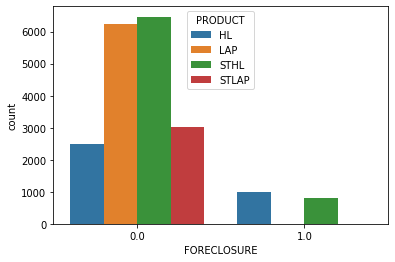

In [18]:
# 1. PRODUCT
print(data['PRODUCT'].groupby(data['FORECLOSURE']).value_counts(normalize = True) * 100)
sns.countplot(x = data['FORECLOSURE'], hue = data['PRODUCT'])
plt.show()

Mostly <b>HL</b> and <b>STHL</b> products show foreclosures. Among Foreclosures HL has 55.15% and STHL has 44.75% and very less in LAP (0.11%).

FORECLOSURE  SEX
0.0          M      87.465374
             F      12.534626
1.0          M      87.208481
             F      12.791519
Name: SEX, dtype: float64


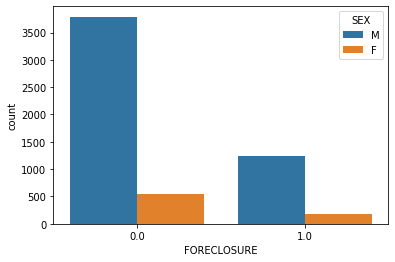

In [19]:
# SEX
print(data['SEX'].groupby(data['FORECLOSURE']).value_counts(normalize = True) * 100)
sns.countplot(x = data['FORECLOSURE'], hue = data['SEX'])
plt.show()

Among Foreclosures 87.20% are Males.

In [20]:
# SEX and PRODUCT
data['SEX'].groupby((data['FORECLOSURE'], data['PRODUCT'])).value_counts(normalize = True) * 100

FORECLOSURE  PRODUCT  SEX
0.0          HL       M      89.795918
                      F      10.204082
             LAP      M      88.026125
                      F      11.973875
             STHL     M      86.617557
                      F      13.382443
             STLAP    M      87.138264
                      F      12.861736
1.0          HL       M      89.793103
                      F      10.206897
             STHL     M      84.492754
                      F      15.507246
Name: SEX, dtype: float64

Among ForeClosures <b>HL</b> has <b>89.8%</b> males and <b>STHL</b> has <b>84.4%</b> males.

FORECLOSURE  MARITAL_STATUS
0.0          M                 91.710921
             S                  8.289079
1.0          M                 92.367491
             S                  7.632509
Name: MARITAL_STATUS, dtype: float64


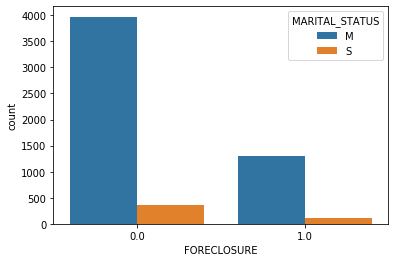

In [21]:
# MARITAL_STATUS
print(data['MARITAL_STATUS'].groupby(data['FORECLOSURE']).value_counts(normalize = True) * 100)
sns.countplot(x = data['FORECLOSURE'], hue = data['MARITAL_STATUS'])
plt.show()

Among Foreclosures <b>92.3%</b> are Married.

In [22]:
# MARITAL_STATUS and SEX
data['MARITAL_STATUS'].groupby((data['FORECLOSURE'], data['SEX'])).value_counts(normalize = True) * 100

FORECLOSURE  SEX  MARITAL_STATUS
0.0          F    M                 94.659300
                  S                  5.340700
             M    M                 91.288279
                  S                  8.711721
1.0          F    M                 96.685083
                  S                  3.314917
             M    M                 91.734198
                  S                  8.265802
Name: MARITAL_STATUS, dtype: float64

Among Married Females <b>96.6%</b> are Foreclosure and among Married males <b>91.73%</b> are Foreclosures.